In [1]:
import pandas as pd
import numpy as np
MyData = pd.read_excel(r"C:/dataset.xlsx")

In [2]:
MyData.shape

(17, 3)

In [3]:
print(MyData.head)
print(MyData.dtypes)

<bound method NDFrame.head of     Age  Income  Expense
0    25   28425    20000
1    26   22170    20000
2    27   40857    35000
3    28   25486    20000
4    29   34805    30000
5    23   33410    25000
6    32   34943    30000
7   109   38608    12000
8   225   40286    12000
9    34   44140    21000
10   56   29158    12000
11   78   42098    13000
12   21   25730    20000
13   34   25818    21000
14   56   20778    23000
15   32   47165    40000
16   34   22903    15000>
Age        int64
Income     int64
Expense    int64
dtype: object


In [4]:
MyData.isnull().sum() 

Age        0
Income     0
Expense    0
dtype: int64

In [5]:
MyData.describe() 

,Age,Income,Expense
count,17.000000,17.000000,17.000000
mean,51.117647,32751.764706,21705.882353
std,50.362290,8385.789919,8206.435781
min,21.000000,20778.000000,12000.000000
25%,27.000000,25730.000000,15000.000000
50%,32.000000,33410.000000,20000.000000
75%,56.000000,40286.000000,25000.000000
max,225.000000,47165.000000,40000.000000


In [6]:
#Checking different percentiles
pd.DataFrame(MyData['Age']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,Age
count,17.000000
mean,51.117647
std,50.362290
min,21.000000
1%,21.320000
10%,24.200000
30%,27.800000
50%,32.000000
75%,56.000000
90%,90.400000


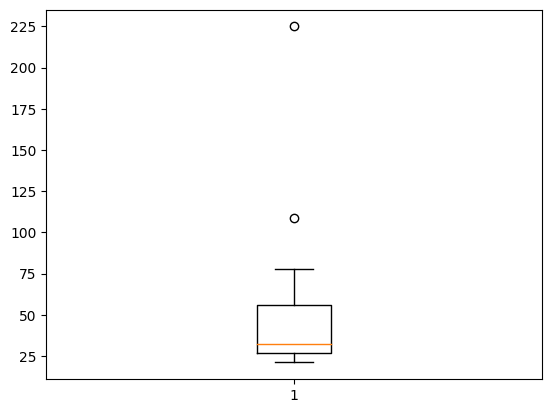

In [7]:
#checking boxplot for Age column
import matplotlib.pyplot as plt
# %matplotlib inline
plt.boxplot(MyData['Age'])
plt.show()

In [8]:
#Checking Outlier by definition and treating outliers

#getting median Age
Age_col_df = pd.DataFrame(MyData['Age'])
Age_median = Age_col_df.median()

#getting IQR of Age column
Q3 = Age_col_df.quantile(q=0.75)
Q1 = Age_col_df.quantile(q=0.25)
IQR = Q3-Q1

#Deriving boundaries of Outliers
IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

#Finding and treating outliers - both lower and upper end
MyData.loc[MyData['Age']>IQR_UL , 'Age'] = int(Age_col_df.quantile(q=0.90))
MyData.loc[MyData['Age']<IQR_LL , 'Age'] = int(Age_col_df.quantile(q=0.01))

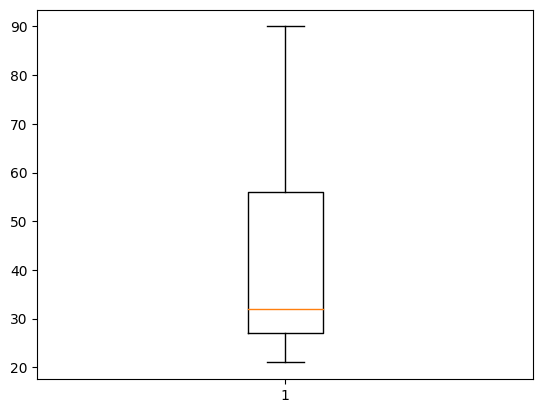

In [9]:
#Check max age value now
max(MyData['Age'])
plt.boxplot(MyData['Age'])
plt.show()

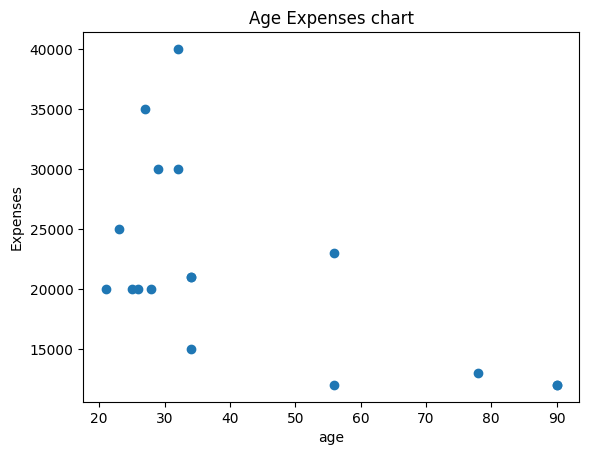

In [11]:
#Check how Expense is varying with Age
x = MyData["Age"]
y=  MyData["Expense"]
plt.scatter(x, y)
plt.title('Age Expenses chart')
plt.xlabel('age')
plt.ylabel('Expenses')
plt.show()

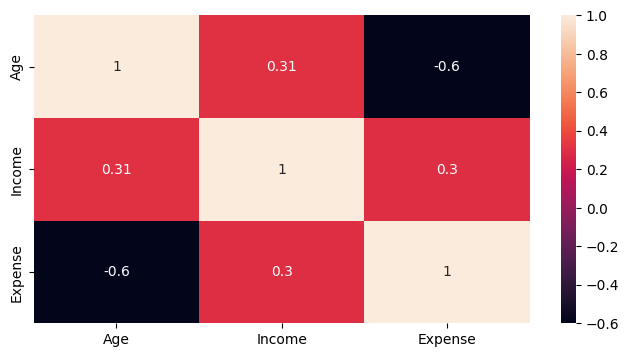

In [12]:
#check correltion matrix - to check the strength of variation bwtween two variables
correlation_matrix= MyData.corr().round(2)
fgr, ax = plt.subplots(figsize =(8, 4)) 
import seaborn as sns
c = sns.heatmap(data=correlation_matrix, annot=True)
fgr.savefig("myimage.png")

In [13]:
#Separating features and response
'''features = ["Income","Age"]
response = ["Expense"]
x=MyData[features]
y=MyData[response]'''

#print(x)

#Normalization/scaling of data - understanding scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(MyData)
scaled_data

#converting data back to pandas dataframe
MyData_scaled = pd.DataFrame(scaled_data)
MyData_scaled.columns = MyData.columns

#Separating features and response
features = ["Income","Age"]
response = ["Expense"]
x=MyData_scaled[features]
y=MyData_scaled[response]

In [14]:
#Dividing data in test and train
#Importing neccesary packages
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

#Fitting lineaar regression model
model = LinearRegression()
model.fit(x_train, y_train)

#Checking accuracy on test data
accuracy = model.score(x_test,y_test)
print(accuracy*100,'%')

53.64011315093605 %


In [15]:
import numpy as np

y_pred = model.predict(x_test)

print('R2_score : ',metrics.r2_score(y_pred,y_test))
print('MSE : ',metrics.mean_squared_error(y_pred,y_test))

R2_score :  -0.9291485172183709
MSE :  0.014783127184012751


In [16]:
x_test #the test data - predictors

,Income,Age
1,0.052753,0.072464
6,0.536817,0.159420


In [17]:
y_test #the actual values in test data - target column

,Expense
1,0.285714
6,0.642857


In [18]:
y_pred

array([[0.2961481 ],
       [0.47122559]])

In [19]:
print(model.intercept_ ) #checking the intercept of model equation
print(model.coef_)   #Checking the coefficients of model equation

[0.31784557]
[[ 0.47797879 -0.64739125]]


In [20]:
#print(model.predict([[40, 40000]]))
scaled_data = scaler.fit_transform([[40, 40000]])
print(model.predict(scaled_data))

[[0.31784557]]


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
y_test = [1, 2, 3]
y_pred = [1, 2, 3]
metrics.r2_score(y_test, y_pred)

1.0